# Google Gemini Flash 2.0 Native image output

Google's Gemini 2.0 Flash model just got a major upgrade! This experimental version (`gemini-2.0-flash-exp`) now features **native image output**, allowing it to generate images directly, alongside text. This opens exciting possibilities of the model.

**Key Features:**

*   **Multimodal Powerhouse:** Works seamlessly with text, images, and audio for both input and output.
*   **Conversational Image Editing:** Refine images using natural language – it's like having a dialogue with your image editor!
*   **Combined Outputs:** Generate content with interwoven text and images. Think illustrated stories or visually-rich instructions, all in one go.
*   **Text Rendering:** Accurately renders text within images, a significant improvement over many existing models.
*	**World Knowledge:** Creates realistic, detailed images.

Access this experimental model via Google AI Studio or the Gemini API.

In [ ]:
%pip install google-genai pillow

In [21]:
import os, io
from google import genai
from IPython.display import Image, display, Markdown
from PIL import Image as PILImage
# Create client
client = genai.Client(api_key=os.getenv("GEMINI_API_KEY","xxx"))

# Define Gemini model id 
model_id = "gemini-2.0-flash-exp"

# helper method to display images
def display_image(data):
    display(Image(data=data))

def save_image(data, filename):
    image = PILImage.open(io.BytesIO(data))
    image.save(filename)

First, let's generate an image using the Gemini 2.0 Flash model.

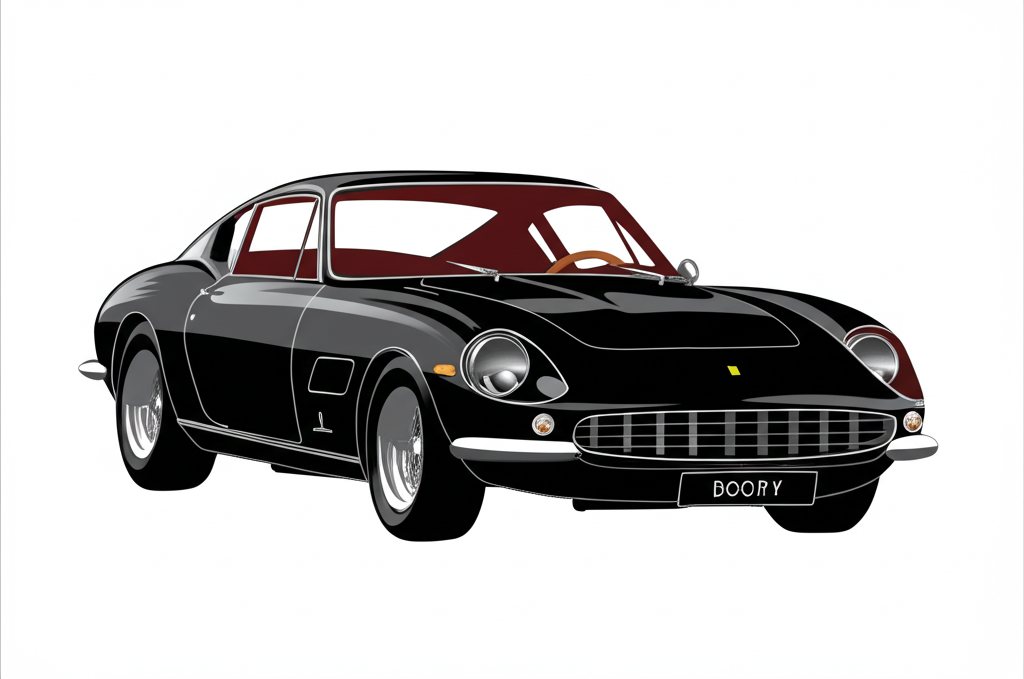



Experience the timeless allure of Italian automotive excellence with this sleek, black sports car, reminiscent of the legendary 1960s Ferrari grand tourers.

In [27]:
from google.genai.types import GenerateContentConfig 

# Define generation config to include image output
config = GenerateContentConfig(response_modalities=['Text', 'Image'])

# Image generation prompt
prompt = "An Image of a black sports car in the style of a 1960s Ferrari and create a 1 sentence marketing description"

# Generate the image
response = client.models.generate_content(
    model=model_id,
    contents=prompt,
    config=config
)


# Iterate over the response candidates and display the image and text
for part in response.candidates[0].content.parts:
    if part.inline_data:
        display_image(part.inline_data.data)
        save_image(part.inline_data.data, f"car.png")
    else:
        display(Markdown(part.text))

Lets make it red.

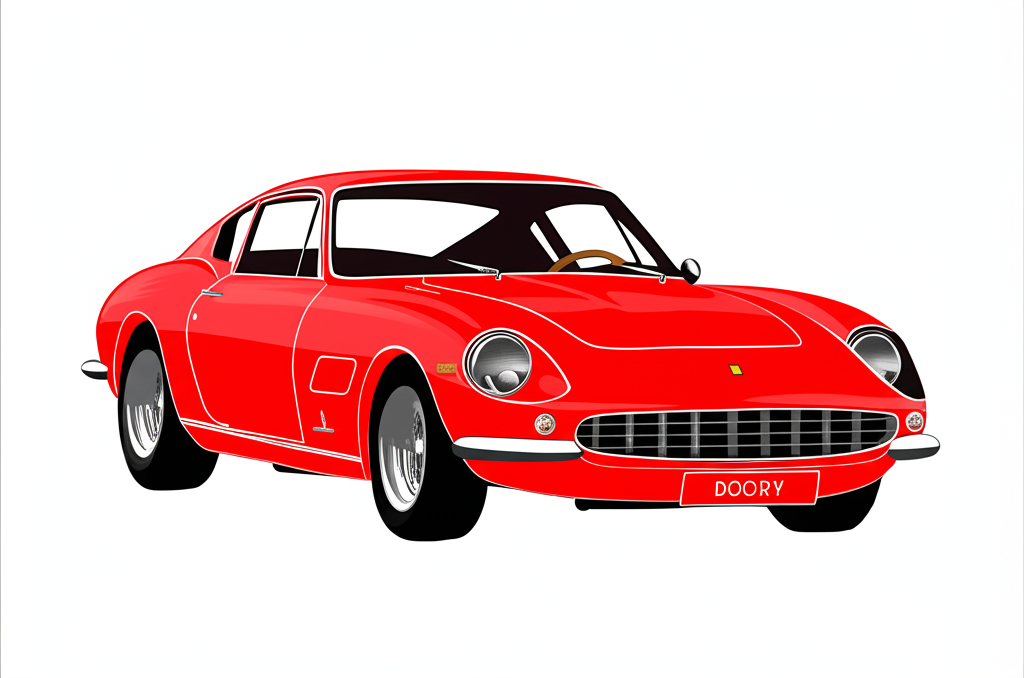

In [28]:
prompt = "Make the car red"

# Generate the image
response = client.models.generate_content(
    model=model_id,
    contents=[prompt,PILImage.open("car.png")],
    config=config
)

for part in response.candidates[0].content.parts:
    if part.inline_data:
        display_image(part.inline_data.data)
        save_image(part.inline_data.data, f"car_red.png")
    else:
        display(Markdown(part.text))